<a href="https://colab.research.google.com/github/rkmaccha/ML_prepclasses/blob/main/ML_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Logistic Regression Project

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Projects/datasets/placement_dummy.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[ : , 1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df.shape

(100, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

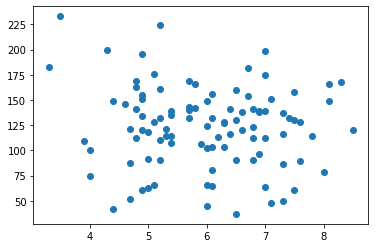

In [ ]:
plt.scatter(df['cgpa'],df['iq'])

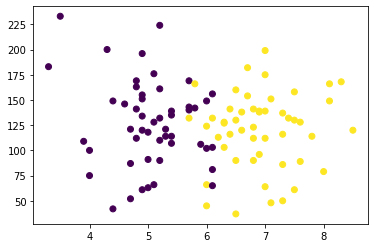

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c= df['placement'])

In [ ]:
X= df.iloc[ : ,0:2]

In [ ]:
y = df.iloc[ : ,-1]

In [ ]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1)

In [ ]:
X_train.shape

(90, 2)

In [ ]:
X_test.shape

(10, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
X_train = scalar.fit_transform(X_train)

In [ ]:
X_test= scalar.transform(X_test)

In [ ]:
X_train

array([[ 0.02714132, -1.49704004],
       [ 0.89954075,  0.3940488 ],
       [ 0.46334103, -0.8753122 ],
       [-0.67077823,  0.96396599],
       [ 0.11438126,  0.21271152],
       [-2.32833716,  1.53388317],
       [ 0.46334103,  0.16090086],
       [-0.49629834,  0.3940488 ],
       [-0.14733857,  0.47176478],
       [-0.14733857,  1.09349262],
       [-1.71765755, -0.61625894],
       [ 0.28886115,  0.08318488],
       [-0.93249806,  1.87065242],
       [-0.93249806,  0.80853403],
       [ 1.33574047,  0.88625001],
       [ 2.03366001,  1.14530327],
       [-0.93249806,  0.26452217],
       [-0.67077823,  0.21271152],
       [-1.019738  ,  1.1712086 ],
       [-0.49629834, -0.25358436],
       [ 1.16126058, -1.91152527],
       [ 0.2016212 , -0.27948969],
       [-0.93249806,  0.70491272],
       [-0.84525812, -0.84940688],
       [-2.15385727,  2.8291495 ],
       [ 1.16126058,  0.34223815],
       [-0.93249806, -0.0981524 ],
       [ 0.89954075,  1.32664056],
       [ 0.55058098,

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
LR.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
y_test

37    1
1     0
73    0
57    1
32    1
55    1
4     0
20    1
38    1
39    0
Name: placement, dtype: int64

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


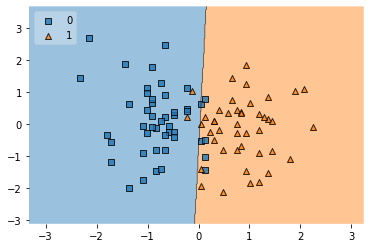

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=LR, legend=2)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/ML_Projects/PickleModels/LR_model.pkl',"wb") as f:
  pickle.dump(f)

In [ ]:
with open('/content/drive/MyDrive/ML_Projects/PickleModels/LR_model.pkl',"rb") as f:
  pickle_model = pickle.load(f)

In [ ]:
pickle_model.predict([[6.8,123]])

array([1])

In [ ]:
pickle_model.predict([[3.2,75]])

array([1])